In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df = pd.read_csv("NYCRollingSalesWithSingleTitles.csv")
location = "NYCRollingSalesWithSingleTitles.csv"
df = pd.read_csv(location)
import statsmodels.formula.api as smf


In [2]:
%matplotlib inline

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,TAXCLASSATPRESENT,BLOCK,LOT,EASEMENT,BUILDINGCLASSATPRESENT,ADDRESS,...,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSATTIMEOFSALE,BUILDINGCLASSATTIMEOFSALE,SALEPRICE,SALEDATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


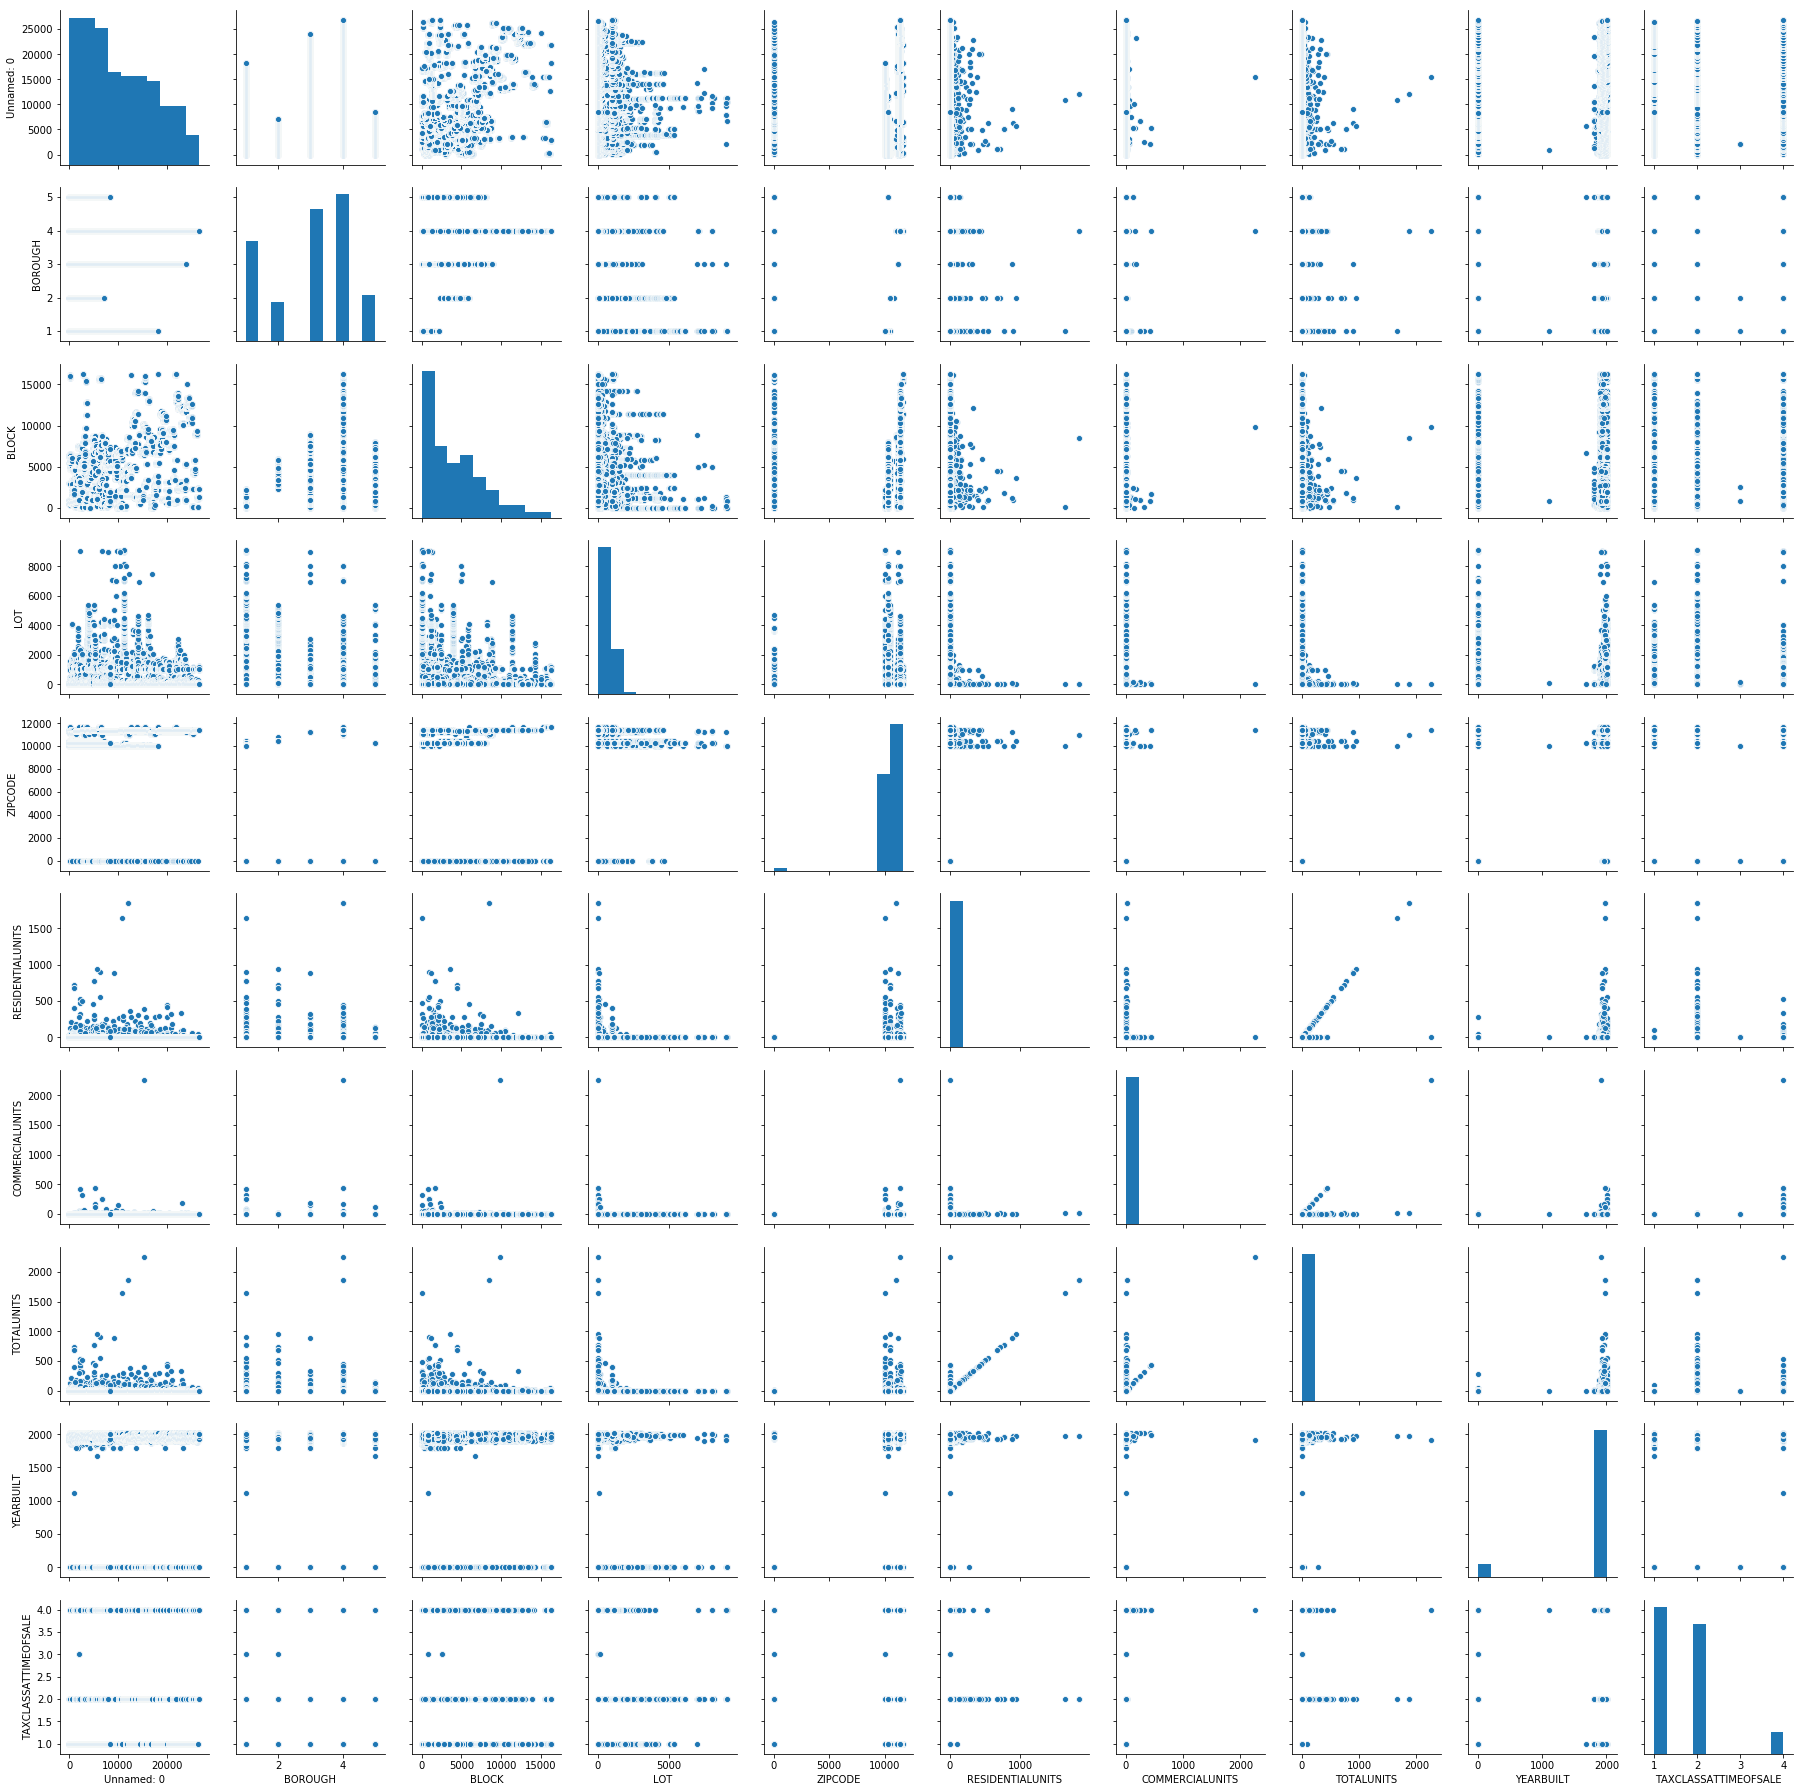

In [4]:
sns.pairplot(df)

In [5]:
corr = df.corr()

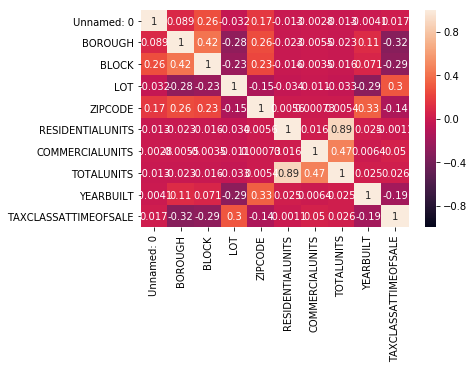

In [6]:
sns.heatmap(corr, vmin=-1 , annot=True)

In [7]:
df.dtypes

Unnamed: 0                    int64
BOROUGH                       int64
NEIGHBORHOOD                 object
BUILDINGCLASSCATEGORY        object
TAXCLASSATPRESENT            object
BLOCK                         int64
LOT                           int64
EASEMENT                     object
BUILDINGCLASSATPRESENT       object
ADDRESS                      object
APARTMENTNUMBER              object
ZIPCODE                       int64
RESIDENTIALUNITS              int64
COMMERCIALUNITS               int64
TOTALUNITS                    int64
LANDSQUAREFEET               object
GROSSSQUAREFEET              object
YEARBUILT                     int64
TAXCLASSATTIMEOFSALE          int64
BUILDINGCLASSATTIMEOFSALE    object
SALEPRICE                    object
SALEDATE                     object
dtype: object

In [8]:
df.count()

Unnamed: 0                   84548
BOROUGH                      84548
NEIGHBORHOOD                 84548
BUILDINGCLASSCATEGORY        84548
TAXCLASSATPRESENT            84548
BLOCK                        84548
LOT                          84548
EASEMENT                     84548
BUILDINGCLASSATPRESENT       84548
ADDRESS                      84548
APARTMENTNUMBER              84548
ZIPCODE                      84548
RESIDENTIALUNITS             84548
COMMERCIALUNITS              84548
TOTALUNITS                   84548
LANDSQUAREFEET               84548
GROSSSQUAREFEET              84548
YEARBUILT                    84548
TAXCLASSATTIMEOFSALE         84548
BUILDINGCLASSATTIMEOFSALE    84548
SALEPRICE                    84548
SALEDATE                     84548
dtype: int64

In [9]:
df.corr()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,YEARBUILT,TAXCLASSATTIMEOFSALE
Unnamed: 0,1.000000,0.088817,0.264130,-0.031601,0.166882,-0.013318,-0.002821,-0.012856,-0.004057,0.017395
BOROUGH,0.088817,1.000000,0.417001,-0.277848,0.256564,-0.023229,-0.005503,-0.023346,0.108303,-0.315163
BLOCK,0.264130,0.417001,1.000000,-0.229118,0.234063,-0.015628,-0.003517,-0.015888,0.071262,-0.287300
LOT,-0.031601,-0.277848,-0.229118,1.000000,-0.145802,-0.034303,-0.010953,-0.033169,-0.289463,0.296680
ZIPCODE,0.166882,0.256564,0.234063,-0.145802,1.000000,0.005578,0.000726,0.005415,0.330708,-0.142915
RESIDENTIALUNITS,-0.013318,-0.023229,-0.015628,-0.034303,0.005578,1.000000,0.015653,0.888309,0.025380,-0.001074
COMMERCIALUNITS,-0.002821,-0.005503,-0.003517,-0.010953,0.000726,0.015653,1.000000,0.472998,0.006428,0.049586
TOTALUNITS,-0.012856,-0.023346,-0.015888,-0.033169,0.005415,0.888309,0.472998,1.000000,0.024568,0.026429
YEARBUILT,-0.004057,0.108303,0.071262,-0.289463,0.330708,0.025380,0.006428,0.024568,1.000000,-0.187609
TAXCLASSATTIMEOFSALE,0.017395,-0.315163,-0.287300,0.296680,-0.142915,-0.001074,0.049586,0.026429,-0.187609,1.000000


In [10]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,TAXCLASSATPRESENT,BLOCK,LOT,EASEMENT,BUILDINGCLASSATPRESENT,ADDRESS,...,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSATTIMEOFSALE,BUILDINGCLASSATTIMEOFSALE,SALEPRICE,SALEDATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


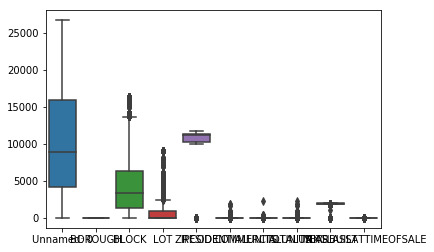

In [11]:
sns.boxplot(data=df)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df = pd.read_csv("NYCRollingSalesWithSingleTitles.csv")
location = "NYCRollingSalesWithSingleTitles.csv"
df = pd.read_csv(location)
import statsmodels.formula.api as smf


C:\Users\kenbe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


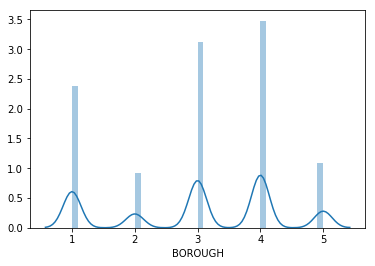

In [2]:
sns.distplot(df['BOROUGH'])

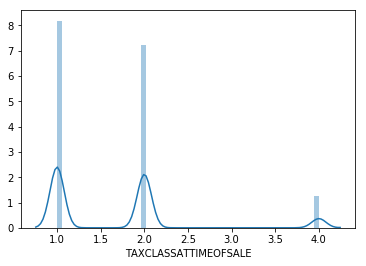

In [3]:
sns.distplot(df['TAXCLASSATTIMEOFSALE'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

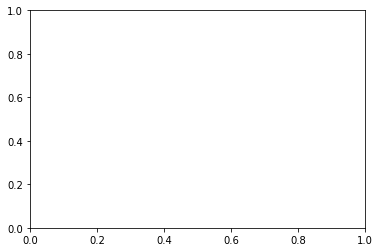

In [4]:
sns.distplot(df['SALEPRICE'])

In [5]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,YEARBUILT,TAXCLASSATTIMEOFSALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [6]:
df.tail(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,TAXCLASSATPRESENT,BLOCK,LOT,EASEMENT,BUILDINGCLASSATPRESENT,ADDRESS,...,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSATTIMEOFSALE,BUILDINGCLASSATTIMEOFSALE,SALEPRICE,SALEDATE
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,10/27/2016 0:00


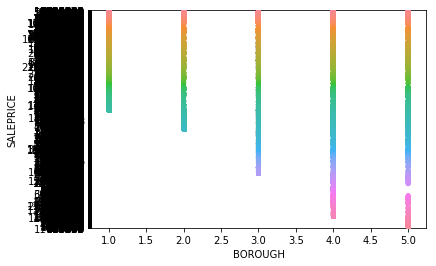

In [7]:
sns.stripplot(x='BOROUGH', y='SALEPRICE', data=df)

In [8]:
df.groupby(['BOROUGH', 'SALEPRICE']).mean()

Unnamed: 0        BLOCK          LOT       ZIPCODE  \
BOROUGH SALEPRICE                                                         
1        -          9171.675976  1113.468322   866.242307   9922.325834   
        1           8447.062500  1273.093750  1007.062500  10047.500000   
        10          9217.410526  1084.673684   871.284211  10033.378947   
        100        10790.333333  1034.833333   203.333333  10019.666667   
        1000        9782.000000  1027.000000  1336.000000  10019.000000   
        10000      13195.000000  1104.500000   921.250000  10032.750000   
        100000      8620.500000  1538.000000   535.000000  10036.250000   
        1000000     6682.666667  1378.166667   447.333333  10020.000000   
        10000000    8052.500000  1075.625000   221.125000  10024.500000   
        100107200   2568.000000    10.000000    33.000000  10004.000000   
        1001958     5335.000000  1916.000000  1264.000000  10027.000000   
        10020866   12801.000000  1406.000000  1359.000000  10021.000000   
        10025000    1813.000000   452.000000    47.000000  10003.000000   
        100335     11770.000000  1431.000000     1.000000  10075.000000   
        1004000    11142.000000    16.000000  2718.000000  10280.000000   
        10050      12548.500000  1450.000000    23.000000  10021.000000   
        100603       374.000000   751.000000     1.000000  10001.000000   
        1006031     5300.000000  1916.000000  1210.000000  10027.000000   
        1007002     1747.000000  1090.000000  1258.000000  10036.000000   
        1007500     9018.000000  1046.000000     1.000000  10019.000000   
        1008271     6404.000000   928.000000  1626.000000  10010.000000   
        1008387     9211.000000  1020.000000  1199.000000  10019.000000   
        10084889   14409.000000  1499.000000  1104.000000  10128.000000   
        1009085     5321.000000  1916.000000  1245.000000  10027.000000   
        1010000    10170.333333  1163.666667   846.333333  10018.666667   
        10100000    8029.500000  1436.500000    29.000000  10027.500000   
        1010238    17662.000000  1890.000000     1.000000  10025.000000   
        101164       358.000000   748.000000     1.000000  10011.000000   
        10124043     588.000000   699.000000  1337.000000  10001.000000   
        1012500    14304.000000  1582.000000     5.000000  10028.000000   
...                         ...          ...          ...           ...   
5       957319      5360.000000  7495.000000    99.000000  10309.000000   
        9594        2860.000000  5461.000000  1011.000000  10308.000000   
        959500      1407.000000  3294.000000    86.000000  10304.000000   
        960000      6408.000000  3817.500000   132.000000  10306.500000   
        962000      4175.000000    47.000000    86.000000  10301.000000   
        962246      2057.500000   430.000000    10.000000  10302.500000   
        965000      4391.500000  6588.000000    64.500000  10309.500000   
        966000      6272.000000  6109.000000    49.000000  10309.000000   
        966319      1846.500000  5717.000000    70.500000  10312.000000   
        967337      5765.000000  6708.000000    34.000000  10309.000000   
        967745      5883.000000  2247.000000    27.000000  10306.000000   
        970000      4628.200000  2971.600000   120.400000  10305.000000   
        972428      1845.000000  5717.000000    69.000000  10312.000000   
        975000      5611.833333  3562.666667    92.833333  10306.500000   
        977418      4518.000000   950.000000    99.000000  10306.000000   
        980000      4439.400000  4302.800000    48.200000  10307.000000   
        985000      4134.000000   736.000000    82.000000  10304.000000   
        987702      1404.500000  3292.000000    42.000000  10304.000000   
        988000      3188.000000  6887.000000    58.000000  10309.000000   
        989000      7189.000000  7925.000000    33.000000  10307.000000   
        990000      4785.000000  3418.000000  

In [9]:
pd.pivot_table(df, values=['BOROUGH'], index=['SALEPRICE'])

,BOROUGH
SALEPRICE,
-,3.368038
0,2.817071
1,2.716418
10,3.190601
100,3.300000
1000,3.324675
10000,3.200000
100000,3.382353
1000000,2.733333


In [10]:
df.fillna(0)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,TAXCLASSATPRESENT,BLOCK,LOT,EASEMENT,BUILDINGCLASSATPRESENT,ADDRESS,...,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSATTIMEOFSALE,BUILDINGCLASSATTIMEOFSALE,SALEPRICE,SALEDATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,7/20/2017 0:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,7/20/2017 0:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,6/20/2017 0:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,11/7/2016 0:00


In [11]:
pd.pivot_table(df, index=['BOROUGH'])

,BLOCK,COMMERCIALUNITS,LOT,RESIDENTIALUNITS,TAXCLASSATTIMEOFSALE,TOTALUNITS,Unnamed: 0,YEARBUILT,ZIPCODE
BOROUGH,,,,,,,,,
1,1108.161750,0.299683,749.201409,2.307495,2.130176,2.649623,9156.5,1706.773845,9913.852125
2,4201.187544,0.160874,300.252518,3.436658,1.525606,3.603774,3528.0,1745.715279,10361.799404
3,4313.198653,0.147960,337.821350,2.035639,1.661455,2.220651,12027.0,1767.358673,11073.456938
4,6629.870175,0.206351,229.730476,1.701489,1.513278,1.938996,13371.5,1852.045631,11300.420669
5,3254.757788,0.079667,203.562782,1.227586,1.186207,1.309869,4208.5,1868.961237,10039.674197


In [12]:
pd.pivot_table(df, index=['SALEPRICE'])

,BLOCK,BOROUGH,COMMERCIALUNITS,LOT,RESIDENTIALUNITS,TAXCLASSATTIMEOFSALE,TOTALUNITS,Unnamed: 0,YEARBUILT,ZIPCODE
SALEPRICE,,,,,,,,,,
-,4434.988119,3.368038,0.294829,387.738480,2.629490,1.732024,3.003709,10617.636769,1741.136872,10686.505254
0,4455.806512,2.817071,0.226926,274.851975,2.900665,1.714118,3.193782,10214.113512,1736.484650,10950.132088
1,4486.350746,2.716418,0.298507,349.425373,7.000000,1.865672,7.305970,10310.552239,1565.052239,10392.656716
10,4586.875979,3.190601,0.091384,379.836815,2.701044,1.447781,2.823760,10070.609661,1773.736292,10855.270235
100,5969.388889,3.300000,0.211111,197.344444,1.211111,1.588889,1.433333,10052.922222,1715.677778,10428.477778
1000,5867.467532,3.324675,0.155844,401.103896,0.935065,2.116883,1.363636,10504.272727,1469.792208,10224.259740
10000,5553.907692,3.200000,0.123077,214.369231,1.338462,1.815385,1.584615,10546.369231,1587.984615,10388.107692
100000,5952.215686,3.382353,0.088235,299.186275,0.970588,1.823529,1.078431,10346.843137,1541.892157,10270.058824
1000000,4195.911111,2.733333,0.666667,167.733333,2.711111,2.555556,3.377778,11282.688889,1937.377778,10967.733333


In [13]:
pd.pivot_table(df, index=['BOROUGH'])""

SyntaxError: invalid syntax (<ipython-input-13-467a596378d9>, line 1)

In [14]:
pd.pivot_table(df, index=['BOROUGH'])

,BLOCK,COMMERCIALUNITS,LOT,RESIDENTIALUNITS,TAXCLASSATTIMEOFSALE,TOTALUNITS,Unnamed: 0,YEARBUILT,ZIPCODE
BOROUGH,,,,,,,,,
1,1108.161750,0.299683,749.201409,2.307495,2.130176,2.649623,9156.5,1706.773845,9913.852125
2,4201.187544,0.160874,300.252518,3.436658,1.525606,3.603774,3528.0,1745.715279,10361.799404
3,4313.198653,0.147960,337.821350,2.035639,1.661455,2.220651,12027.0,1767.358673,11073.456938
4,6629.870175,0.206351,229.730476,1.701489,1.513278,1.938996,13371.5,1852.045631,11300.420669
5,3254.757788,0.079667,203.562782,1.227586,1.186207,1.309869,4208.5,1868.961237,10039.674197


In [15]:
df.groupby(['BOROUGH', 'SALEPRICE']).mean()

Unnamed: 0        BLOCK          LOT       ZIPCODE  \
BOROUGH SALEPRICE                                                         
1        -          9171.675976  1113.468322   866.242307   9922.325834   
        1           8447.062500  1273.093750  1007.062500  10047.500000   
        10          9217.410526  1084.673684   871.284211  10033.378947   
        100        10790.333333  1034.833333   203.333333  10019.666667   
        1000        9782.000000  1027.000000  1336.000000  10019.000000   
        10000      13195.000000  1104.500000   921.250000  10032.750000   
        100000      8620.500000  1538.000000   535.000000  10036.250000   
        1000000     6682.666667  1378.166667   447.333333  10020.000000   
        10000000    8052.500000  1075.625000   221.125000  10024.500000   
        100107200   2568.000000    10.000000    33.000000  10004.000000   
        1001958     5335.000000  1916.000000  1264.000000  10027.000000   
        10020866   12801.000000  1406.000000  1359.000000  10021.000000   
        10025000    1813.000000   452.000000    47.000000  10003.000000   
        100335     11770.000000  1431.000000     1.000000  10075.000000   
        1004000    11142.000000    16.000000  2718.000000  10280.000000   
        10050      12548.500000  1450.000000    23.000000  10021.000000   
        100603       374.000000   751.000000     1.000000  10001.000000   
        1006031     5300.000000  1916.000000  1210.000000  10027.000000   
        1007002     1747.000000  1090.000000  1258.000000  10036.000000   
        1007500     9018.000000  1046.000000     1.000000  10019.000000   
        1008271     6404.000000   928.000000  1626.000000  10010.000000   
        1008387     9211.000000  1020.000000  1199.000000  10019.000000   
        10084889   14409.000000  1499.000000  1104.000000  10128.000000   
        1009085     5321.000000  1916.000000  1245.000000  10027.000000   
        1010000    10170.333333  1163.666667   846.333333  10018.666667   
        10100000    8029.500000  1436.500000    29.000000  10027.500000   
        1010238    17662.000000  1890.000000     1.000000  10025.000000   
        101164       358.000000   748.000000     1.000000  10011.000000   
        10124043     588.000000   699.000000  1337.000000  10001.000000   
        1012500    14304.000000  1582.000000     5.000000  10028.000000   
...                         ...          ...          ...           ...   
5       957319      5360.000000  7495.000000    99.000000  10309.000000   
        9594        2860.000000  5461.000000  1011.000000  10308.000000   
        959500      1407.000000  3294.000000    86.000000  10304.000000   
        960000      6408.000000  3817.500000   132.000000  10306.500000   
        962000      4175.000000    47.000000    86.000000  10301.000000   
        962246      2057.500000   430.000000    10.000000  10302.500000   
        965000      4391.500000  6588.000000    64.500000  10309.500000   
        966000      6272.000000  6109.000000    49.000000  10309.000000   
        966319      1846.500000  5717.000000    70.500000  10312.000000   
        967337      5765.000000  6708.000000    34.000000  10309.000000   
        967745      5883.000000  2247.000000    27.000000  10306.000000   
        970000      4628.200000  2971.600000   120.400000  10305.000000   
        972428      1845.000000  5717.000000    69.000000  10312.000000   
        975000      5611.833333  3562.666667    92.833333  10306.500000   
        977418      4518.000000   950.000000    99.000000  10306.000000   
        980000      4439.400000  4302.800000    48.200000  10307.000000   
        985000      4134.000000   736.000000    82.000000  10304.000000   
        987702      1404.500000  3292.000000    42.000000  10304.000000   
        988000      3188.000000  6887.000000    58.000000  10309.000000   
        989000      7189.000000  7925.000000    33.000000  10307.000000   
        990000      4785.000000  3418.000000  

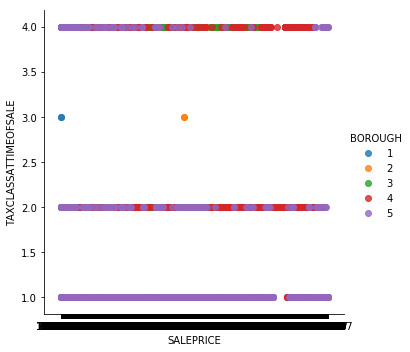

In [16]:
sns.lmplot(x='SALEPRICE', y='TAXCLASSATTIMEOFSALE', data=df, 
           fit_reg=False, 
           hue='BOROUGH')

In [1]:
Colors For Chart = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

SyntaxError: invalid syntax (<ipython-input-1-cbd73bc79a49>, line 1)

In [2]:
sns.stripplot(x='BOROUGH', y='TAXCLASSATTIMEOFSALE', data=df)

NameError: name 'sns' is not defined

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df = pd.read_csv("NYCRollingSalesWithSingleTitles.csv")
location = "NYCRollingSalesWithSingleTitles.csv"
df = pd.read_csv(location)
import statsmodels.formula.api as smf


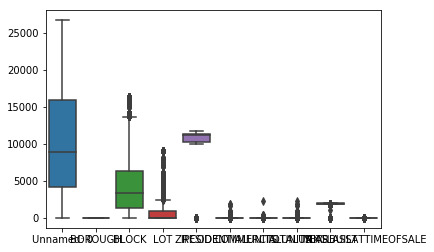

In [4]:
sns.boxplot(data=df)

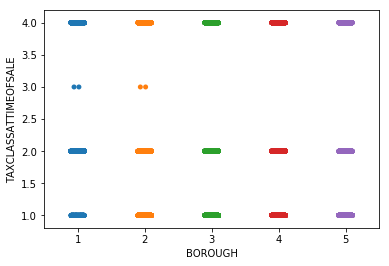

In [5]:
sns.stripplot(x='BOROUGH', y='TAXCLASSATTIMEOFSALE', data=df)

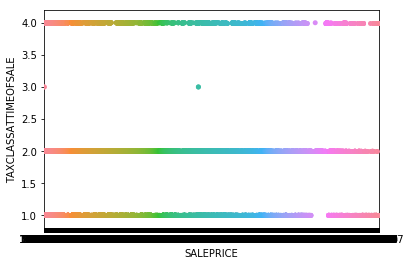

In [6]:
sns.stripplot(x='SALEPRICE', y='TAXCLASSATTIMEOFSALE', data=df)